In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression
from sklearn.ensemble  import RandomForestRegressor
from sklearn.metrics import mean_squared_error

In [11]:
dataset = pd.read_csv('./dataset/Housing.csv')
dataset.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [12]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [13]:
dataset.isnull().sum()

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64

In [14]:
dataset.drop_duplicates(inplace = True)

In [15]:
dataset.describe()

,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


In [16]:
columns_categorical = ['mainroad','guestroom','basement','hotwaterheating','airconditioning','prefarea','furnishingstatus']
label_encoder = LabelEncoder()
for columns in columns_categorical:
    dataset[columns] = label_encoder.fit_transform(dataset[columns])

<Axes: >

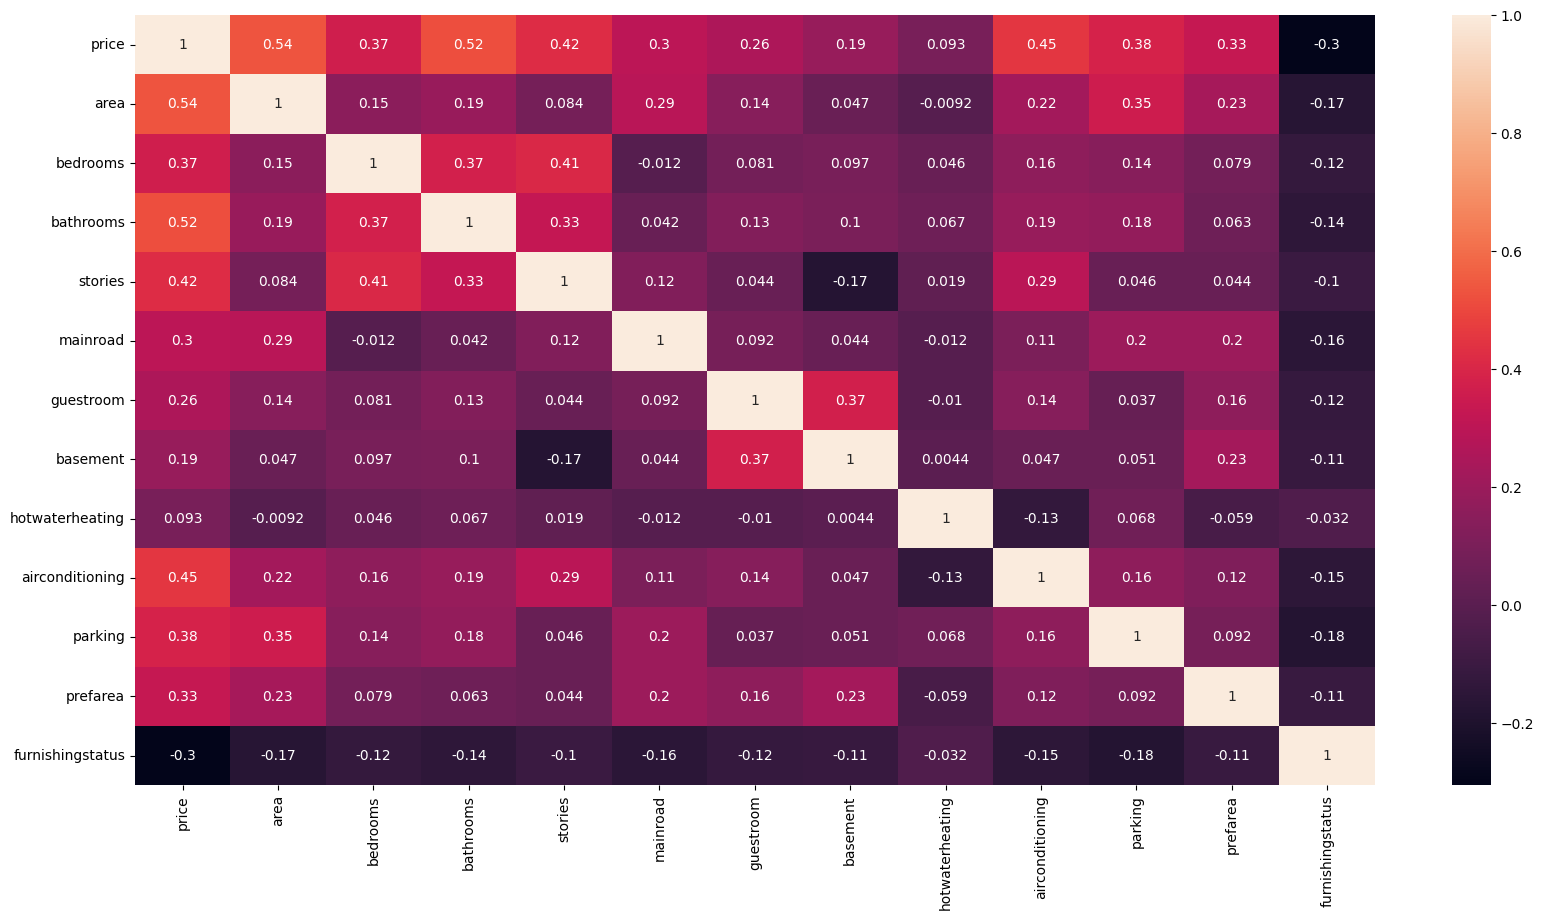

In [17]:
plt.figure(figsize=(20,10), dpi=100)

sns.heatmap(dataset.corr(), annot=True)

In [18]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   price             545 non-null    int64
 1   area              545 non-null    int64
 2   bedrooms          545 non-null    int64
 3   bathrooms         545 non-null    int64
 4   stories           545 non-null    int64
 5   mainroad          545 non-null    int64
 6   guestroom         545 non-null    int64
 7   basement          545 non-null    int64
 8   hotwaterheating   545 non-null    int64
 9   airconditioning   545 non-null    int64
 10  parking           545 non-null    int64
 11  prefarea          545 non-null    int64
 12  furnishingstatus  545 non-null    int64
dtypes: int64(13)
memory usage: 59.6 KB


In [19]:
X = dataset.drop('price', axis = 1)
y = dataset['price']

In [36]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size = .25, random_state = 42)

In [37]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_valid = scaler.transform(X_val)

In [38]:
linear = LinearRegression()
linear.fit(X_train, y_train)
y_pred = linear.predict(X_val)
mse = mean_squared_error(y_pred, y_val)
print(mse)

8.611519040592979e+18


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


In [39]:
svm = SVR()
svm.fit(X_train, y_train)
y_pred = svm.predict(X_val)
mse = mean_squared_error(y_pred, y_val)
print(mse)

4831810831767.143


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but SVR was fitted without feature names
  warnings.warn(


In [40]:
rf = RandomForestRegressor()
rf.fit(X_train, y_train)
y_pred = rf.predict(X_val)
mse = mean_squared_error(y_pred, y_val)
print(mse)

10023521269146.715


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but RandomForestRegressor was fitted without feature names
  warnings.warn(


In [41]:
from keras import models, layers
from keras.callbacks import EarlyStopping

In [42]:
model = models.Sequential([
    layers.Dense(128, activation = 'relu'),
    layers.Dense(64, activation = 'relu'),
    layers.Dense(1),
])
early_stopping = EarlyStopping(monitor='val_loss', patience=5, mode='min', restore_best_weights=True)

In [43]:
model.compile(loss='mean_squared_error', optimizer='adam')

In [46]:
history = model.fit(X_train, y_train, epochs=20, batch_size=64, validation_data=(X_val, y_val), callbacks = [early_stopping])

Epoch 1/20
7/7 [==============================] - 2s 64ms/step - loss: 25690762117120.0000 - val_loss: 27754391142400.0000
Epoch 2/20
7/7 [==============================] - 0s 16ms/step - loss: 25690755825664.0000 - val_loss: 27738524090368.0000
Epoch 3/20
7/7 [==============================] - 0s 14ms/step - loss: 25690741145600.0000 - val_loss: 27719997849600.0000
Epoch 4/20
7/7 [==============================] - 0s 16ms/step - loss: 25690730659840.0000 - val_loss: 27697319247872.0000
Epoch 5/20
7/7 [==============================] - 0s 14ms/step - loss: 25690711785472.0000 - val_loss: 27669483749376.0000
Epoch 6/20
7/7 [==============================] - 0s 16ms/step - loss: 25690695008256.0000 - val_loss: 27633257545728.0000
Epoch 7/20
7/7 [==============================] - 0s 14ms/step - loss: 25690669842432.0000 - val_loss: 27587273293824.0000
Epoch 8/20
7/7 [==============================] - 0s 16ms/step - loss: 25690638385152.0000 - val_loss: 27531694571520.0000
Epoch 9/20
7/7 [

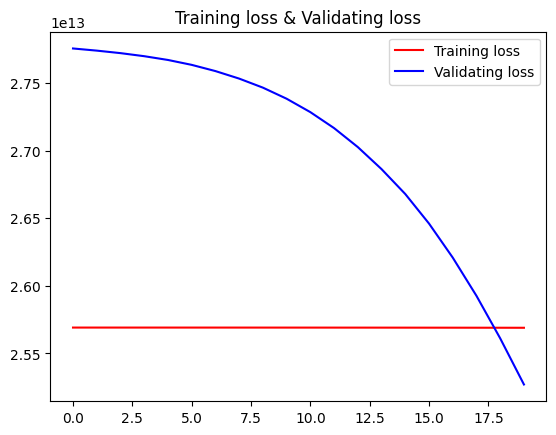

In [48]:
# Train loss vs val loss
train_loss, val_loss = history_["loss"], history_["val_loss"]
epochs = range(len(train_loss))
plt.plot(epochs, train_loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validating loss')
plt.title('Training loss & Validating loss')
plt.legend()

plt.show()